# Deepa Dorairaj (DED76)

# Exercise 2

## Part I: KNN Classifier

In this exercise we implement the KNN for classification of the Iris dataset

First, understand the dataset and its contents by finding the keys and reading the description of the dataset by running the code block below 

In [1]:
from sklearn.datasets import load_iris
iris_dataset=load_iris() #creates an object that contains the iris dataset
print('Keys of the iris_dataset is:', iris_dataset.keys())

Keys of the iris_dataset is: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [2]:
print(iris_dataset.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

A) Classify the Iris species with KNN approach using the first two feature only (X_train[:, : 2], X_test[:, : 2]), and check the accuracy as K changes. Let K takes the values [1, 5, 10, 15]. No need to scale features.
In the code, use random_state=100 in train_test_split as below.

Plot the accuracy and comment on your result

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

test_accuracy=[] # you can use the .append to test_accuracy to store the result
X_train, X_test, Y_train, Y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=100)

# K=1

In [4]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train[:, : 2],Y_train)
Accuracy = knn.score(X_test[:, : 2],Y_test)
print(Accuracy)
test_accuracy.append(Accuracy)

0.7368421052631579


# K=5

In [5]:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train[:, : 2],Y_train)
Accuracy1 = knn1.score(X_test[:, : 2],Y_test)
print(Accuracy1)
test_accuracy.append(Accuracy1)

0.8421052631578947


# K=10

In [6]:
knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(X_train[:, : 2],Y_train)
Accuracy2 = knn2.score(X_test[:, : 2],Y_test)
print(Accuracy2)
test_accuracy.append(Accuracy2)

0.8421052631578947


# K=15

In [7]:
knn3 = KNeighborsClassifier(n_neighbors=15)
knn3.fit(X_train[:, : 2],Y_train)
Accuracy3 = knn3.score(X_test[:, : 2],Y_test)
print(Accuracy3)
test_accuracy.append(Accuracy3)

0.7631578947368421


# Combined Test Scores

In [8]:
test_accuracy

[0.7368421052631579,
 0.8421052631578947,
 0.8421052631578947,
 0.7631578947368421]

Text(0.5,1,'Accuracy plot')

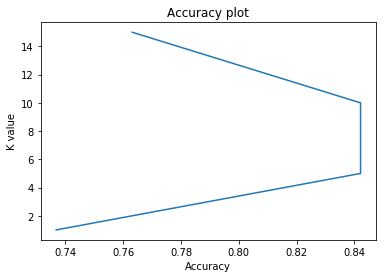

In [9]:
k=[1,5,10,15]
plt.plot(test_accuracy,k)
plt.ylabel('K value')
plt.xlabel('Accuracy')
plt.title('Accuracy plot')

Text(0,0.5,'k value')

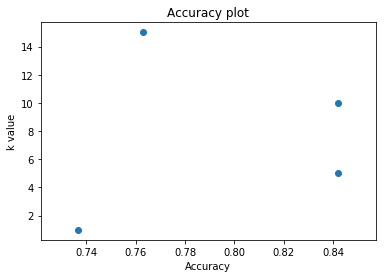

In [10]:
plt.scatter(test_accuracy,k)
plt.title("Accuracy plot")
plt.xlabel("Accuracy")
plt.ylabel("k value")

Text(0.5,0,'Accuracy')

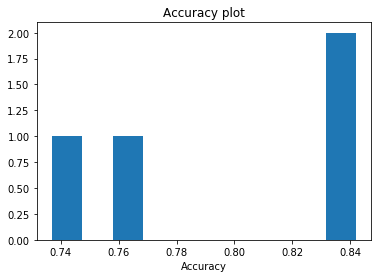

In [11]:
plt.hist(test_accuracy)
plt.title("Accuracy plot")
plt.xlabel("Accuracy")

# From the accuracy score we can come to a conclusion that if k value is very low or very high the accuracy is low. To get a better k value we can use cross validation and predict the best k value to use.

B) Use the Iris example, and find the accuracy of the KNN approach with K=5 when different number of features is used without scaling. 
Hint: To use N_features only from training data use: X_train[:, : N_features ]
Write down the accuracy when using one, two, three, and the four features


In [12]:
test_accuracy2=[]

# Using one feature

In [13]:
knn4 = KNeighborsClassifier(n_neighbors=5)
knn4.fit(X_train[:, : 1],Y_train)
Accuracy4 = knn4.score(X_test[:, : 1],Y_test)
print(Accuracy4)
test_accuracy2.append(Accuracy4)

0.7894736842105263


# Using 2 features

In [14]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train[:, : 2],Y_train)
Accuracy5 = knn5.score(X_test[:, : 2],Y_test)
print(Accuracy5)
test_accuracy2.append(Accuracy5)

0.8421052631578947


# Using 3 features

In [15]:
knn6 = KNeighborsClassifier(n_neighbors=5)
knn6.fit(X_train[:, : 3],Y_train)
Accuracy6 = knn6.score(X_test[:, : 3],Y_test)
print(Accuracy6)
test_accuracy2.append(Accuracy6)

0.9210526315789473


# Using all the features

In [16]:
knn7 = KNeighborsClassifier(n_neighbors=5)
knn7.fit(X_train,Y_train)
Accuracy7 = knn7.score(X_test,Y_test)
print(Accuracy7)
test_accuracy2.append(Accuracy7)

0.9736842105263158


# Combined Test Scores

In [17]:
test_accuracy2

[0.7894736842105263,
 0.8421052631578947,
 0.9210526315789473,
 0.9736842105263158]

# When using all the features we are getting higher accuracy while we reduce the number of features the accuracy rate also reduces. It is better to train and test the dataset with all the features for better accuracy.

C) Repeat B when feature scaling with MinMaxScaler is used

In [18]:
test_accuracy3=[]

In [19]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit(X_train[:, : 1])
X_train_transformed = scaler.transform(X_train[:, : 1])
X_test_transformed = scaler.transform(X_test[:, : 1])
knn8 = KNeighborsClassifier(n_neighbors=5)
knn8.fit(X_train_transformed,Y_train)
Accuracy8 = knn8.score(X_test_transformed,Y_test)
print(Accuracy8)
test_accuracy3.append(Accuracy8)

0.7894736842105263


In [20]:
scaler = preprocessing.MinMaxScaler().fit(X_train[:, : 2])
X_train_transformed = scaler.transform(X_train[:, : 2])
X_test_transformed = scaler.transform(X_test[:, : 2])
knn9 = KNeighborsClassifier(n_neighbors=5)
knn9.fit(X_train_transformed,Y_train)
Accuracy9 = knn9.score(X_test_transformed,Y_test)
print(Accuracy9)
test_accuracy3.append(Accuracy9)

0.8421052631578947


In [21]:
scaler = preprocessing.MinMaxScaler().fit(X_train[:, : 3])
X_train_transformed = scaler.transform(X_train[:, : 3])
X_test_transformed = scaler.transform(X_test[:, : 3])
knn10 = KNeighborsClassifier(n_neighbors=5)
knn10.fit(X_train_transformed,Y_train)
Accuracy10 = knn10.score(X_test_transformed,Y_test)
print(Accuracy10)
test_accuracy3.append(Accuracy10)

0.9736842105263158


In [22]:
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)
knn11 = KNeighborsClassifier(n_neighbors=5)
knn11.fit(X_train_transformed,Y_train)
Accuracy11 = knn11.score(X_test_transformed,Y_test)
print(Accuracy11)
test_accuracy3.append(Accuracy11)

0.9736842105263158


# Combined Test Scores

In [23]:
test_accuracy3

[0.7894736842105263,
 0.8421052631578947,
 0.9736842105263158,
 0.9736842105263158]

# When K=5 before feature scaling with 3 features the accuracy was 92% which changed to 97% after feature scaling. Hence we can clearly see that the data has standardised/normalized after doing feature scaling.

## Part 2: Linear Regression

Using the Scikit-Learn library, fit a linear regression model using advertising trianing set, then find the mean square error of the fitted model using test data. Use random_state= 0 in the train_test_split function.

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

AdvertisingData=pd.read_csv('Advertising.csv')
X = AdvertisingData[['Radio', 'TV','Newspaper']].values
Y = AdvertisingData.Sales
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)

# write you code here to answer the above question
linreg = LinearRegression().fit(X_train,Y_train)
print("the intercept is:", linreg.intercept_)
print("the coefficient of TV feature is:", linreg.coef_)

the intercept is: 2.892570051151157
the coefficient of TV feature is: [0.19900368 0.04416235 0.00116268]


In [25]:
AdvertisingData.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Mean Square Error

In [26]:
from sklearn.metrics import mean_squared_error
target_predicted=linreg.predict(X_test)
MSE=mean_squared_error(Y_test, target_predicted)
print('mean square error', MSE)

mean square error 4.012497522917106
